In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy import signal
from scipy import fftpack

# Extracting Low and High Frequencies using Wavelets

## La Gioconda (MonaLisa)

In [2]:
# Load the image
img = cv2.imread('MonaLisa.jpg', cv2.IMREAD_GRAYSCALE)
original = np.array(img)


### Fourier

In [54]:
def fourier(image):
    # Apply Fourier Transform
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)

    # Create a mask for low-pass filtering (leaving the center)
    rows, cols = image.shape
    crow, ccol = int(rows / 2), int(cols / 2)
    mask = np.zeros((rows, cols), np.uint8)
    mask[crow - 30:crow + 30, ccol - 30:ccol + 30] = 1

    # Apply the mask and inverse Fourier transform
    fshift_masked = fshift * mask
    f_ishift = np.fft.ifftshift(fshift_masked)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    
    low_freq = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)

    # Return the low and high frequency components
    return low_freq, image - img_back

### DB4 and Haar

In [125]:
def apply_wavelet(image, wavelet):
    # Apply wavelet decomposition
    coeffs = pywt.dwt2(image, wavelet)
    cA, (cH, cV, cD) = coeffs

    # Combine details into a single high-frequency image
    high_freq = np.sqrt(cH**2 + cV**2 + cD**2)
    
    # Convert to log scale for display
    high_freq = np.log1p(np.abs(high_freq))
    
    # Normalize to 0-255 for display
    high_freq = cv2.normalize(high_freq, None, 0, 255, cv2.NORM_MINMAX)
    
    cA = coeffs[0]

    low_freq_image = pywt.idwt2((cA, (None, None, None)), wavelet)
    

    return low_freq_image, high_freq





## Visualization

In [126]:
# Apply filters
low_db4, high_db4 = apply_wavelet(img, 'db4')
low_haar, high_haar = apply_wavelet(img, 'haar')
low_fourier, high_fourier = fourier(img)



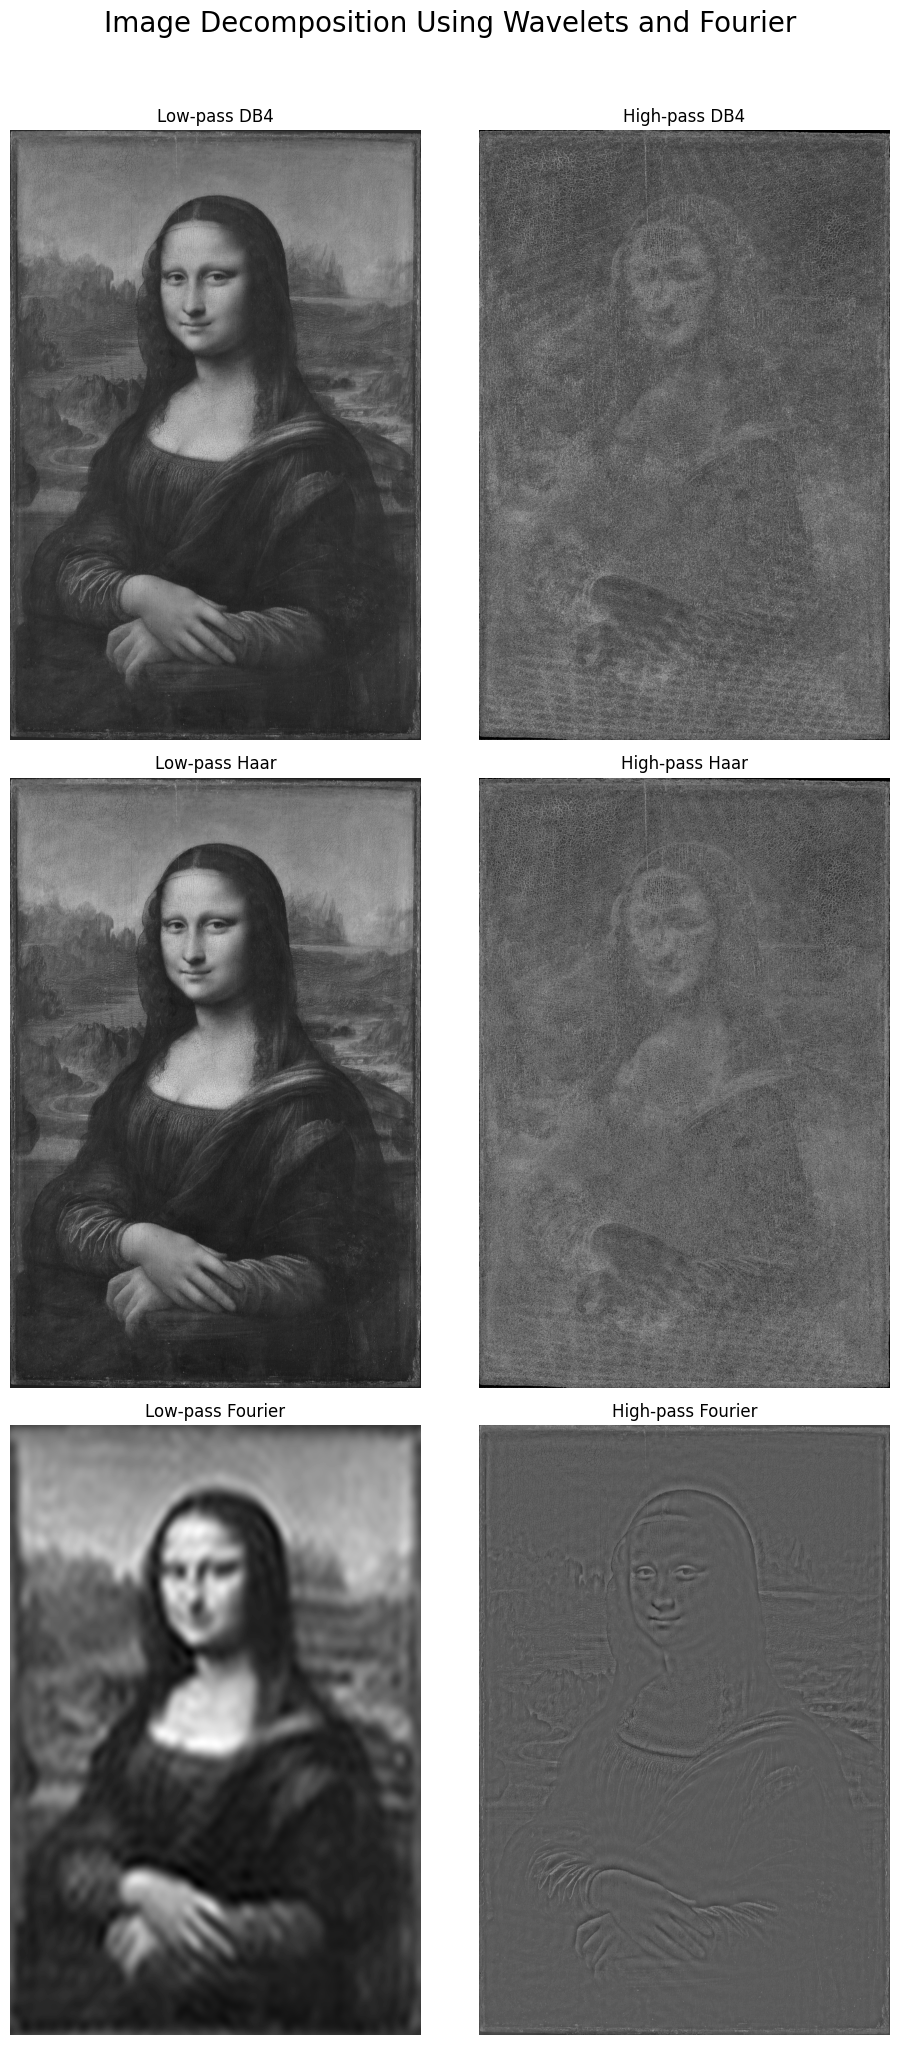

In [133]:
## Print Images

# Display
fig, axs = plt.subplots(3, 2, figsize=(10, 20))
plt.suptitle("Image Decomposition Using Wavelets and Fourier", fontsize=20, y=1.02)

axs[0, 0].imshow(low_db4, cmap='gray')
axs[0, 0].set_title('Low-pass DB4')
axs[0, 1].imshow(high_db4, cmap='gray')
axs[0, 1].set_title('High-pass DB4')

axs[1, 0].imshow(low_haar, cmap='gray')
axs[1, 0].set_title('Low-pass Haar')
axs[1, 1].imshow(high_haar, cmap='gray')
axs[1, 1].set_title('High-pass Haar')

axs[2, 0].imshow(low_fourier, cmap='gray')
axs[2, 0].set_title('Low-pass Fourier')
axs[2, 1].imshow(high_fourier, cmap='gray')
axs[2, 1].set_title('High-pass Fourier')


for ax in axs.flat:
    ax.axis('off')

# Show the plot

plt.tight_layout()
plt.show()